In [179]:
import numpy as np
import pandas as pd

In [180]:
# 붓꽃 품종 데이터를 이용해서 품종 분류하기

from sklearn.datasets import load_iris

### 붓꽃 품종 데이터
# - 품종 : setosa, versicolor, virginica
# - sepal length : 꽃받임 길이
# - sepal width : 꽃받임 폭
# - petal length : 꽃잎 길이
# - petal width : 꽃잎 폭

iris = load_iris()
print(iris)

###
# print(iris.DESCR)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

# 데이터에 따른 품종 변화
## 1. K-최근접이웃(KNN, 이웃값 조정)
## 2. 특성공학(릿지, 라쏘)
## 3. 로지스틱 회귀분류(이진분류, 다중분류)

In [181]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [182]:
iris_input = iris["data"]
iris_input

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [183]:
iris_target = iris["target"]
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [184]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [185]:
### 사용 패키지 불러들이기
from sklearn.model_selection import train_test_split

### 데이터 나누기
train_input, test_input, train_target, test_target = \
    train_test_split(iris_input, iris_target, random_state=42)
    
### 차원 확인하기
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(112, 4)
(112,)
(38, 4)
(38,)


## 1. KNN

##### n_neighbors=5

In [186]:
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor()

kn.fit(train_input, train_target)

print("훈련 = ", kn.score(train_input, train_target))
print("테스트 = ", kn.score(test_input, test_target))

훈련 =  0.9588588220888943
테스트 =  0.9835594886922321


##### n_neighbors= 수 조정하면서 최적의 이웃값 갯수 찾기

In [187]:
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor(n_neighbors=4)

kn.fit(train_input, train_target)

print("훈련 = ", kn.score(train_input, train_target))
print("테스트 = ", kn.score(test_input, test_target))

### (해석)

# 과소적합 발생
# - 훈련모델을 복잡하게 만들어 평가결과를 높이는 방법 사용
# - 이웃의 갯수를 5 -> 4로 작게 하여 이웃의 비교대상을 압축시키고,
# - 훈련의 집중도와 정확도를 높임

훈련 =  0.9657156850740786
테스트 =  0.9906588003933137


## 2. 특성공학

In [188]:
### 사이킷런 변환기 클래스
from sklearn.preprocessing import PolynomialFeatures

In [189]:
### train_input, test_input 데이터 변환하기
# 변수명 : train_poly, test_poly 사용

### 객체생성(모델)
poly = PolynomialFeatures(include_bias=False)

### 훈련시키기 : 새롭게 만들 스스로 특성 조합 찾기
poly.fit(train_input)

### 찾은 특성 조합으로 데이터 변환하기
# - 훈련데이터 변환하기
train_poly = poly.transform(train_input)

# - 테스트데이터 변환하기
test_poly = poly.transform(test_input)

print(train_poly.shape, test_poly.shape)

(112, 14) (38, 14)


### 2-0 다중회귀

In [190]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_poly, train_target)
print("훈련 = ", lr.score(train_poly, train_target))
print("테스트 = ", lr.score(test_poly, test_target))

훈련 =  0.9486949445238945
테스트 =  0.9436486105118044


In [191]:
### train_input, test_input 데이터 변환하기
# 변수명 : train_poly, test_poly 사용

### 객체생성(모델)
poly = PolynomialFeatures(degree=4, include_bias=False)

### 훈련시키기 : 새롭게 만들 스스로 특성 조합 찾기
poly.fit(train_input)

### 찾은 특성 조합으로 데이터 변환하기
# - 훈련데이터 변환하기
train_poly = poly.transform(train_input)

# - 테스트데이터 변환하기
test_poly = poly.transform(test_input)

print(train_poly.shape, test_poly.shape)

(112, 69) (38, 69)


In [192]:
### 훈련데이터 학습 다시하기
lr.fit(train_poly, train_target)

print("훈련 = ", lr.score(train_poly, train_target))
print("테스트 = ", lr.score(test_poly, test_target))

훈련 =  0.978888622214396
테스트 =  0.5455281822841327


In [193]:
### (해석)

##### - 훈련 =  0.9486949445238945 
##### - 테스트 =  0.9436486105118044
##### --------------------------------------------------------
##### - 훈련 평가 결과(degree=3) 일때
##### - 훈련 =  0.9598349251291011
##### - 테스트 =  0.9401077744852095
##### --------------------------------------------------------
##### - 훈련 평가 결과(degree=4) 일때
##### - 훈련 =  0.978888622214396
##### - 테스트 =  0.5455281822841327

##### - 차수를 3으로 주었을때, 훈련 결정계수가 소폭 상승했으며, 테스트 결정계수는 소폭 하락했다.
##### - 차수를 4으로 주었을때, 훈련 결정계수는 상승했지만, 테스트 결정계수가 낮아졌다.

##### - 과대적합 발생

In [194]:
### 과적합을 줄이는 방법 : 규제(Regularization) 사용

### <규제순서>
##### 1. 정규화 : 스케일이 다른 항목들을 표준점수로 동일하게 표준화 합니다.
##### 2. 릿지 및 라쏘 모델 적용

### 2.1 정규화

In [195]:
### 사용패키지
from sklearn.preprocessing import StandardScaler

### 클래스(모델) 생성하기
ss = StandardScaler()

### 스스로 표준점수를 만들어냅니다.
ss.fit(train_poly, train_target)

### 훈련데이터 표준점수로 변환하기
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 평균 및 표준편차 확인하기
print(ss.mean_, ss.scale_)

[5.83035714e+00 3.04017857e+00 3.80714286e+00 1.21428571e+00
 3.46580357e+01 1.76994643e+01 2.34092857e+01 7.56232143e+00
 9.43205357e+00 1.12778571e+01 3.58491071e+00 1.74787500e+01
 5.85803571e+00 2.02892857e+00 2.10011696e+02 1.05101536e+02
 1.46235393e+02 4.77431250e+01 5.47805000e+01 6.95275000e+01
 2.24247679e+01 1.10896089e+02 3.73232500e+01 1.29476786e+01
 2.98464375e+01 3.39509821e+01 1.07362589e+01 5.15385357e+01
 1.73351875e+01 6.03666964e+00 8.75452321e+01 2.99080357e+01
 1.04770893e+01 3.75512500e+00 1.29663047e+03 6.36500357e+02
 9.27573859e+02 3.05428850e+02 3.24617520e+02 4.35625634e+02
 1.42207002e+02 7.12938184e+02 2.40678539e+02 8.35639821e+01
 1.72796705e+02 2.09667989e+02 6.74087232e+01 3.28600118e+02
 1.11050088e+02 3.87374357e+01 5.66661077e+02 1.93678859e+02
 6.78099286e+01 2.42782786e+01 9.62762277e+01 1.03845193e+02
 3.26061687e+01 1.54022234e+02 5.19475866e+01 1.81776973e+01
 2.59379571e+02 8.91212723e+01 3.14114027e+01 1.13260384e+01
 4.58279941e+02 1.577728

### 2-2 릿지 모델

In [196]:
from sklearn.linear_model import Ridge

### 객체(모델) 생성
ridge = Ridge()

### 훈련모델 생성
ridge.fit(train_scaled, train_target)

### 훈련데이터 결정계수
print("훈련 = ", ridge.score(train_scaled, train_target))

### 테스트데이터 결정계수
print("테스트 = ", ridge.score(test_scaled, test_target))


훈련 =  0.9484248078961096
테스트 =  0.9446419335755182


### 2-3 라쏘 모델

In [197]:
from sklearn.linear_model import Lasso

### 객체(모델) 생성
lasso = Lasso()

### 훈련모델 생성
lasso.fit(train_scaled, train_target)

### 훈련데이터 결정계수
print("훈련 = ", lasso.score(train_scaled, train_target))

### 테스트데이터 결정계수
print("테스트 = ", lasso.score(test_scaled, test_target))

훈련 =  0.0
테스트 =  -0.015873329420263538


### 2-4 규제강도 조절하기
##### - alpha 속성을 사용하여 릿지 및 라쏘 모델 규제에 강한 강도를 조절하기
##### - 그래프 그린 후 각각 훈련, 학습 데이터 모델 생성 후 평가 실시


In [198]:
### alpha 강도 조절값 찾아보기
import matplotlib.pyplot as plt

### 2-5 규제강도 조절 후 릿지 모델

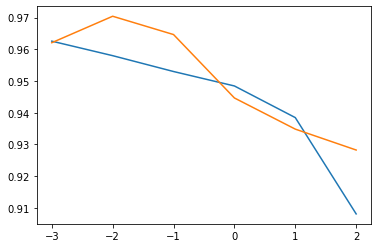

In [199]:
# 훈련 시 발생하는 결정계수를 저장할 리스트
train_score = []
# 테스트 시 발생하는 결정계수를 저장할 리스트 
test_score = []

# 임의 alpha 값(x축으로 설정합니다.) 설정(범위 설정)
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

### 훈련 및 테스트 결정계수 데이터 조회하기
for alpha in alpha_list :
    # 릿지 모델
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
    
### 그래프로 시각화
# - log10 : 지수로 표현
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [200]:
# 릿지 모델
ridge = Ridge(alpha=0.001)
ridge.fit(train_scaled, train_target)
print("훈련 = ", ridge.score(train_scaled, train_target))
print("테스트 = ", ridge.score(test_scaled, test_target))

훈련 =  0.9625454662782881
테스트 =  0.962060996418763


### 2-6 규제강도 조절 후 라쏘 모델

c:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.245e-01, tolerance: 7.292e-03
  model = cd_fast.enet_coordinate_descent(


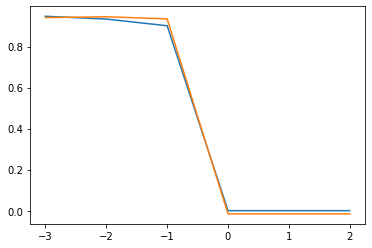

In [201]:
# 훈련 시 발생하는 결정계수를 저장할 리스트
train_score = []
# 테스트 시 발생하는 결정계수를 저장할 리스트 
test_score = []

# 임의 alpha 값(x축으로 설정합니다.) 설정(범위 설정)
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

### 훈련 및 테스트 결정계수 데이터 조회하기
for alpha in alpha_list :
    # 라쏘 모델
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
    
### 그래프로 시각화
# - log10 : 지수로 표현
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [202]:
# 라쏘 모델
lasso = Lasso(alpha = 0)
lasso.fit(train_scaled, train_target)
print("훈련 = ", lasso.score(train_scaled, train_target))
print("테스트 = ", lasso.score(test_scaled, test_target))

훈련 =  0.9526612262974605
테스트 =  0.9675484519724951


C:\Users\admin\AppData\Local\Temp\ipykernel_6396\2849944454.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(train_scaled, train_target)
c:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.726e+00, tolerance: 7.292e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_desce

In [203]:
### 규제 강도 조정 후 결정계수

# 릿지(ridge)
# 훈련 =  0.9625454662782881
# 테스트 =  0.962060996418763

# 라쏘(lasso)
# 훈련 =  0.9526612262974605
# 테스트 =  0.9675484519724951

### (해석)
##### 이번에는 과소적합 발생 좀 더 나은 분석 모델 확인 필요 

## 3.로지스틱 회귀분류 모델

In [204]:
### K-최근접이웃분류 모델로 테스트

### 라이브러리 생성
from sklearn.neighbors import KNeighborsClassifier

### 클래스(모델) 생성
kn = KNeighborsClassifier(n_neighbors=3)

kn.fit(train_scaled, train_target)

### 훈련데이터 정확도
print(kn.score(train_scaled, train_target))

### 테스트데이터 정확도
print(kn.score(test_scaled, test_target))

0.9642857142857143
1.0


In [206]:
## 상위 5개 예측하기
print(kn.predict(test_scaled[:5]))
print(test_target[:5])

# [[실제값, 예측값], [실제값, 예측값]]
import numpy as np

np.column_stack((test_target[:5], kn.predict(test_scaled[:5])))

[1 0 2 1 1]
[1 0 2 1 1]


array([[1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1]])

In [207]:
### 각 행의 범주들의 확률값 확인

proba = kn.predict_proba(test_scaled[:5])
np.round(proba, decimals=4)

array([[0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.8, 0.2]])

In [208]:
### 5개의 데이터의 이웃들 확인하기
# - 각 행마다 이웃이 3개씩

distances, indexes = kn.kneighbors(test_scaled[:5])
print(indexes)

for test_data in test_scaled[:5] :
    distances, indexes = kn.kneighbors([test_data])
    print(train_target[indexes])


[[ 31  71 103 107  12]
 [ 40   5   6  86 109]
 [ 16  13  56  98 111]
 [ 71  78  82  14  31]
 [ 84  72  10   8 103]]
[[1 1 1 1 1]]
[[0 0 0 0 0]]
[[2 2 2 2 2]]
[[1 1 1 1 1]]
[[1 1 1 2 1]]


### 3-1 로지스틱 회귀 이진분류

##### - 1) 시그모이드 함수 사용(setosa, versicolor)

In [209]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [210]:
### 이진분류 방식은 2개의 범주만 사용 가능합니다.
# - 기존 데이터에서 2개(setosa과 versicolor) 범주만 추출하여 사용
# 독립변수명 : train_setosa_versicolor
# 종속변수명 : target_setosa_versicolor

target_setosa_versicolor = train_target[(train_target == 0) | (train_target == 1)]
target_setosa_versicolor.shape

train_setosa_versicolor = train_scaled[(train_target == 0) | (train_target == 1)]
train_setosa_versicolor.shape

(74, 69)

In [211]:
### 이진분류 하기
### 사용할 패키지 불러들이기
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_setosa_versicolor, target_setosa_versicolor)
lr.score(train_setosa_versicolor, target_setosa_versicolor)

1.0

In [212]:
# 예측 상위 5개
lr.predict(train_setosa_versicolor[:5])

array([0, 0, 1, 1, 0])

In [213]:
### 5개 행에 대한 범주별 확률 조회
print(lr.predict_proba(train_setosa_versicolor[:5]))

[[9.98271841e-01 1.72815929e-03]
 [9.99881677e-01 1.18322687e-04]
 [2.64634142e-04 9.99735366e-01]
 [4.51906344e-05 9.99954809e-01]
 [9.99218504e-01 7.81496422e-04]]


In [214]:
### 훈련모델이 가지고 있는 범주의 순서
print(lr.classes_)

[0 1]


In [215]:
### 계수(또는 가중치) 및 y절편값 조회하기
print(lr.coef_)
print(lr.intercept_)

[[ 0.19892958 -0.37623538  0.40112014  0.36603493  0.16611259 -0.11931314
   0.30059156  0.28562685 -0.34676774  0.27983837  0.27039532  0.27510721
   0.24464657  0.20202638  0.13667266  0.002312    0.22309579  0.21768612
  -0.22046878  0.20916418  0.20961273  0.20741979  0.18755026  0.15738786
  -0.31479283  0.16620873  0.18741081  0.20785063  0.18578238  0.15359638
   0.17379073  0.15223527  0.12536668  0.09902539  0.11090206  0.03835239
   0.16498648  0.16331907 -0.10264384  0.156398    0.15978042  0.15391334
   0.14104317  0.12029368 -0.23761636  0.12928518  0.14596033  0.1563307
   0.14205589  0.11928422  0.12939193  0.11492622  0.09627507  0.07726575
  -0.28194531  0.07507539  0.12053218  0.15009187  0.13698596  0.11427332
   0.13395046  0.11674916  0.09587034  0.07576722  0.10448472  0.09136403
   0.07576714  0.06033389  0.04680911]]
[6.31051659]


In [216]:
# 이진분류에서 z값(선형방정식의 결과값들)을 0~1로 변환
# z값 조회하기
decisions = lr.decision_function(train_setosa_versicolor[:5])
print(decisions)

### 시그모이드 함수 : 싸이파이 패키지의 expit()
from scipy.special import expit
print(expit(decisions))

[-6.35896877 -9.0419767   8.23689761 10.0045755  -7.15351819]
[1.72815929e-03 1.18322687e-04 9.99735366e-01 9.99954809e-01
 7.81496422e-04]


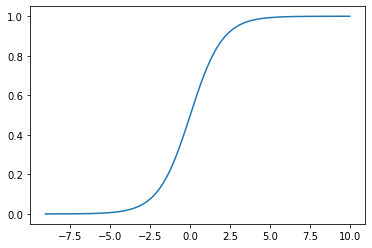

In [217]:
### 시그모이드 함수 예시

import numpy as np
import matplotlib.pyplot as plt

### 임의의 z값
### 실제 사용시
### np.aragne(decisions.min(), decisions.max())
z = np.arange(decisions.min(), decisions.max(), 0.1)

### 시그모이드 공식 사용
# - np.exp() : 0~1의 지수로 변환하기
#            : z값의 스케일을 통일시키기 위해서
#            : z값은 음수로 처리(제곱승 시에 분모로 계산)
#            : 2^(-2) = 1/(2^2), 2^0 = 1
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.show()

##### - 2) 시그모이드 함수 사용(versicolor, virginica)

In [218]:
### 이진분류 방식은 2개의 범주만 사용 가능합니다.
# - 기존 데이터에서 2개(versicolor, virginica) 범주만 추출하여 사용
# 독립변수명 : train_versicolor_virginica
# 종속변수명 : target_versicolor_virginica

target_versicolor_virginica = train_target[(train_target == 1) | (train_target == 2)]
target_versicolor_virginica.shape

train_versicolor_virginica = train_scaled[(train_target == 1) | (train_target == 2)]
train_versicolor_virginica.shape

(77, 69)

In [219]:
lr = LogisticRegression()
lr.fit(train_versicolor_virginica, target_versicolor_virginica)
lr.score(train_versicolor_virginica, target_versicolor_virginica)

0.974025974025974

In [220]:
# 예측 상위 5개
print(lr.predict(train_setosa_versicolor[:5]))

### 훈련모델이 가지고 있는 범주의 순서
print(lr.classes_)

[1 1 1 1 1]
[1 2]


In [221]:
### 5개 행에 대한 범주별 확률 조회
print(lr.predict_proba(train_versicolor_virginica[:5]))

[[0.01628067 0.98371933]
 [0.9896749  0.0103251 ]
 [0.98327631 0.01672369]
 [0.99730785 0.00269215]
 [0.6385721  0.3614279 ]]


In [222]:
# 이진분류에서 z값(선형방정식의 결과값들)을 0~1로 변환
# z값 조회하기
decisions = lr.decision_function(train_versicolor_virginica[:5])
print(decisions)

### 시그모이드 함수 : 싸이파이 패키지의 expit()
from scipy.special import expit
print(expit(decisions))

[ 4.10136236 -4.56279908 -4.07406398 -5.91472051 -0.56917201]
[0.98371933 0.0103251  0.01672369 0.00269215 0.3614279 ]


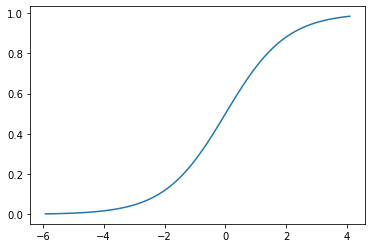

In [223]:
### 시그모이드 함수 예시

import numpy as np
import matplotlib.pyplot as plt

### 임의의 z값
### 실제 사용시
### np.aragne(decisions.min(), decisions.max())
z = np.arange(decisions.min(), decisions.max(), 0.1)

### 시그모이드 공식 사용
# - np.exp() : 0~1의 지수로 변환하기
#            : z값의 스케일을 통일시키기 위해서
#            : z값은 음수로 처리(제곱승 시에 분모로 계산)
#            : 2^(-2) = 1/(2^2), 2^0 = 1
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.show()

##### - 3) 시그모이드 함수 사용(setosa, virginica)

In [224]:
### 이진분류 방식은 2개의 범주만 사용 가능합니다.
# - 기존 데이터에서 2개(setosa, virginica) 범주만 추출하여 사용
# 독립변수명 : train_setosa_virginica
# 종속변수명 : target_setosa_virginica

target_setosa_virginica = train_target[(train_target == 0) | (train_target == 2)]
target_setosa_virginica.shape

train_setosa_virginica = train_scaled[(train_target == 0) | (train_target == 2)]
train_setosa_virginica.shape

(73, 69)

In [225]:
lr = LogisticRegression()
lr.fit(train_setosa_virginica, target_setosa_virginica)
lr.score(train_setosa_virginica, target_setosa_virginica)

1.0

In [226]:
# 예측 상위 5개
print(lr.predict(train_setosa_virginica[:5]))

### 훈련모델이 가지고 있는 범주의 순서
print(lr.classes_)

[0 0 2 0 0]
[0 2]


In [227]:
### 5개 행에 대한 범주별 확률 조회
print(lr.predict_proba(train_setosa_virginica[:5]))

[[9.98359919e-01 1.64008088e-03]
 [9.99533569e-01 4.66430999e-04]
 [1.87457034e-03 9.98125430e-01]
 [9.98710988e-01 1.28901156e-03]
 [9.98448361e-01 1.55163889e-03]]


In [228]:
# 이진분류에서 z값(선형방정식의 결과값들)을 0~1로 변환
# z값 조회하기
decisions = lr.decision_function(train_setosa_virginica[:5])
print(decisions)

### 시그모이드 함수 : 싸이파이 패키지의 expit()
from scipy.special import expit
print(expit(decisions))

[-6.4113683  -7.66993392  6.27749947 -6.65258974 -6.46689071]
[1.64008088e-03 4.66430999e-04 9.98125430e-01 1.28901156e-03
 1.55163889e-03]


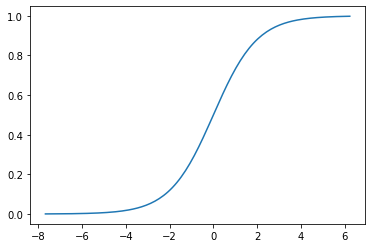

In [229]:
### 시그모이드 함수 예시

import numpy as np
import matplotlib.pyplot as plt

### 임의의 z값
### 실제 사용시
### np.aragne(decisions.min(), decisions.max())
z = np.arange(decisions.min(), decisions.max(), 0.1)

### 시그모이드 공식 사용
# - np.exp() : 0~1의 지수로 변환하기
#            : z값의 스케일을 통일시키기 위해서
#            : z값은 음수로 처리(제곱승 시에 분모로 계산)
#            : 2^(-2) = 1/(2^2), 2^0 = 1
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.show()

### 3-2 로지스틱 회귀 다중분류
##### - 소프트맥스 함수 사용

In [230]:
### 규제강도 = 20
### 반복횟수 = 1000회
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print("훈련 = ", lr.score(train_scaled, train_target))
print("테스트 = ", lr.score(test_scaled, test_target))

훈련 =  0.9821428571428571
테스트 =  1.0


In [231]:
### 상위 5건으로 예측 진행
print(lr.predict(test_scaled[:5]))

[1 0 2 1 1]


In [232]:
### 전체 붓꽃별 확률 확인
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))
print(lr.classes_)

[[0.    0.998 0.002]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    0.994 0.006]
 [0.    0.995 0.005]]
[0 1 2]


In [233]:
### 사용된 계수와 y절편
print(lr.coef_)
print(lr.intercept_)

[[-0.22512516  0.53913866 -0.63624297 -0.55852454 -0.18083033  0.22088104
  -0.45041896 -0.4186703   0.49875352 -0.42968492 -0.38779789 -0.41996073
  -0.37418182 -0.31320864 -0.1427548   0.05348123 -0.31590484 -0.30584019
   0.35098568 -0.29861908 -0.28705809 -0.30170601 -0.27506396 -0.23484733
   0.45433967 -0.24114718 -0.24398018 -0.30430937 -0.27080235 -0.22660138
  -0.25242265 -0.22447364 -0.18816926 -0.15127492 -0.11086857 -0.00182249
  -0.22068102 -0.21941578  0.19580179 -0.20824223 -0.20855027 -0.21285417
  -0.19783274 -0.17229312  0.36682311 -0.16976622 -0.1800936  -0.21677536
  -0.1977351  -0.16880129 -0.17900548 -0.16200615 -0.13854013 -0.11345305
   0.4081433  -0.09368381 -0.13156391 -0.20816922 -0.18768456 -0.15818375
  -0.18585486 -0.16426891 -0.13735705 -0.11058769 -0.14285038 -0.12745485
  -0.10781937 -0.08748749 -0.0690792 ]
 [ 0.6188811  -0.26288165  0.40885365  0.2177197   0.43019921  0.02217636
   0.25008937  0.32983495 -0.13780188  0.26952425  0.29090628  0.03731743

In [234]:
### z 산술연산 결과 확인하기
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=3))

[[ -6.605   6.444   0.161]
 [ 13.493   4.433 -17.926]
 [-35.029  -1.269  36.297]
 [ -7.78    6.447   1.332]
 [-10.141   7.764   2.377]]


In [235]:
### 소프트맥스(softmax)
# 사용하는 패키지 : scipy.special
# 사용하는 모듈 : softmax

from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.998 0.002]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    0.994 0.006]
 [0.    0.995 0.005]]
